# Part 1 Graph

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re
def get_cities_coordinate(coordination_source, separator='\n', skip_starts='//'):
    p = re.compile(r"^{name:'(\w+)', geoCoord:\[(\d+(?:.\d+)*), (\d+(?:.\d+)*)\]}[,]*$")
    cities_coordinate = {}
    for line in coordination_source.split(separator):
        line = line.strip()
        if not line or line.startswith(skip_starts): continue
        m = p.match(line)
        if m is None: continue
        city, x_coordinate, y_coordinate = m.groups()
        cities_coordinate[city] = (float(x_coordinate), float(y_coordinate))
    return cities_coordinate

In [3]:
cities_coordinate = get_cities_coordinate(coordination_source)

In [4]:
cities_coordinate

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [5]:
import math
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def get_cities_distance(origin_city, destination_city):
    return geo_distance(cities_coordinate[origin_city], cities_coordinate[destination_city]) 

In [6]:
get_cities_distance('乌鲁木齐', '嘉峪关')

1165.8679943488457

# Draw the graph

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# %matplotlib inline

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

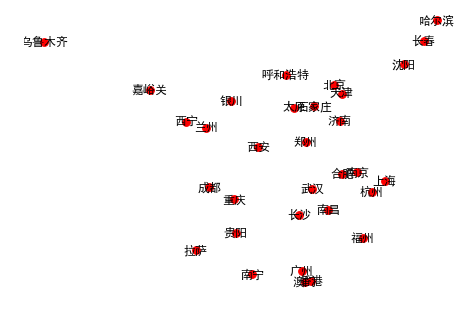

In [8]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(cities_coordinate.keys()))

nx.draw(city_graph, cities_coordinate, with_labels=True, width=200, node_size=60)

In [9]:
from collections import defaultdict

def build_cities_connection(cities_coordinate, threshold = 700):
    cities_connection = defaultdict(list)
    for city in cities_coordinate.keys():
        for connect_city in cities_coordinate.keys():
            if connect_city == city or connect_city in cities_connection[city]: continue
            
            if get_cities_distance(city, connect_city) <= threshold: 
                cities_connection[city].append(connect_city)
    return cities_connection

In [10]:
cities_connection = build_cities_connection(cities_coordinate)

In [11]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

D:\Users\ZengYubin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


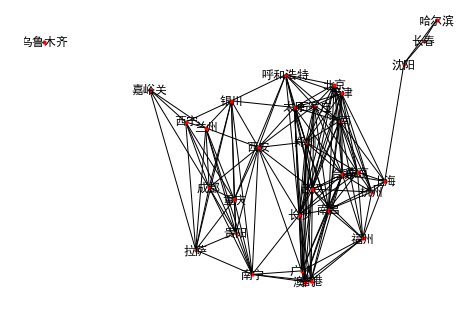

In [12]:
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph, cities_coordinate, with_labels=True, node_size=10)

# BFS & DFS

In [13]:
from collections import deque
def bfs_search(origin, destination, graph=cities_connection):
    """广度优先搜索"""
    
    city_route_queue = deque()
    visted_cities = set()
    
    city_route_queue.append([origin])
    while city_route_queue:
        city_route = city_route_queue.popleft()
        if city_route[-1] in visted_cities: continue
        
        for connect_city in graph[city_route[-1]]:
            if connect_city == destination:
                return city_route + [connect_city]
            
            if connect_city in city_route: continue
            
            city_route_queue.append(city_route + [connect_city])
        visted_cities.add(city_route[-1])

In [14]:
bfs_search('北京', '广州')

['北京', '石家庄', '广州']

In [15]:
def dfs_search(origin, destination, graph=cities_connection):
    """深度优先搜索"""
    
    city_route_stack = deque()
    visted_cities = set()
    
    city_route_stack.append([origin])
    while city_route_stack:
        city_route = city_route_stack.pop()
        if city_route[-1] in visted_cities: continue
        
        for connect_city in graph[city_route[-1]]:
            if connect_city == destination:
                return city_route + [connect_city]
            
            if connect_city in city_route: continue
            
            city_route_stack.append(city_route + [connect_city])
        visted_cities.add(city_route[-1])

In [16]:
dfs_search('北京', '广州')

['北京', '呼和浩特', '银川', '南宁', '广州']

# Optimal search

In [17]:
def bfs_optimal_search(origin, destination, *, search_strategy, graph=cities_connection):
    city_routes = list()
    
    city_routes.append([origin])
    while True:
        city_route = city_routes.pop(0)
        for connect_city in graph[city_route[-1]]:
            if connect_city in city_route: continue
            city_routes.append(city_route + [connect_city])
            
        if not city_routes: return
        
        city_routes = search_strategy(city_routes)
        if city_routes[0][-1] == destination:
            return city_routes[0]

In [18]:
def search_minimum_distance(city_routes):
    return sorted(city_routes, key=lambda city_route: sum([get_cities_distance(city_route[i], city_route[i + 1]) for i in range(len(city_route) - 1)]))

In [19]:
search_minimum_distance([['北京', '广州'], ['哈尔滨', '上海']])

[['北京', '广州'], ['哈尔滨', '上海']]

In [20]:
bfs_optimal_search('北京', '广州', search_strategy=search_minimum_distance)

['北京', '武汉', '广州']

# Machine Learning

In [21]:
from sklearn.datasets import load_boston

In [22]:
dataset = load_boston()

In [23]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [24]:
x, y = dataset['data'], dataset['target']

In [25]:
x_rm = x[:, 5]

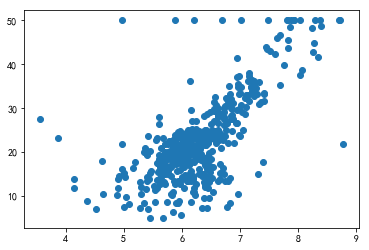

In [26]:
plt.scatter(x_rm, y)

# Linear Regression 

### linear function
$$ y = k*rm + b$$

In [27]:
def price(rm, k, b):
    return k * rm + b

### loss function(mean square loss)
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2 = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2$$

In [28]:
def loss(y, y_hat):
    return sum([(y[i] - y_hat[i])**2 for i in range(len(y))]) / len(y)

### gradient descent
#### partial derivatives
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [29]:
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    return -2 * sum([((y[i] - y_hat[i]) * x[i]) for i in range(n)]) / n

In [30]:
def partial_derivative_b(y, y_hat):
    n = len(y)
    return -2 * sum([(y[i] - y_hat[i]) for i in range(n)]) / n

## training model 

In [31]:
import random
def train(iteration_num, learning_rate=1e-3):
    #initialized parameters
    k = random.random() * 200 - 100  # -100 100
    b = random.random() * 200 - 100  # -100 100
    print("k={}, b={}".format(k, b))
    
    losses = []
    for i in range(iteration_num):

        prices = [price(rm, k, b) for rm in x_rm]

        losses.append(loss(y, prices))

        k = k + (-1 * partial_derivative_k(x_rm, y, prices)) * learning_rate
        b = b + (-1 * partial_derivative_b(y, prices)) * learning_rate
        print("k={}, b={}".format(k, b))
    
    return k, b, losses

In [32]:
k, b, losses = train(200)

k=20.980383731905846, b=-17.27542756211622
k=19.811730503645805, b=-17.45951917646651
k=18.738858478942387, b=-17.628553491057673
k=17.753917947268917, b=-17.783764520180295
k=16.849702518000527, b=-17.92628514497497
k=16.019596397387655, b=-18.057155401759346
k=15.257525986424223, b=-18.177330091088646
k=14.557915445493226, b=-18.287685763218636
k=13.915645900694127, b=-18.38902713107779
k=13.326017993399454, b=-18.48209295766684
k=12.78471749904757, b=-18.56756146095886
k=12.287783763633607, b=-18.646055275842905
k=11.831580726975215, b=-18.718146009413548
k=11.412770320755032, b=-18.784358422933455
k=11.028288046716002, b=-18.845174271064895
k=10.675320556335972, b=-18.901035826458568
k=10.35128506795113, b=-18.952349115486133
k=10.053810470740903, b=-18.999486888789594
k=9.78071997732825, b=-19.042791348380465
k=9.530015198079196, b=-19.082576651240633
k=9.299861520586804, b=-19.119131207741596
k=9.08857468737372, b=-19.15271979169767
k=8.89460847361377, b=-19.18358547749062
k=8.71

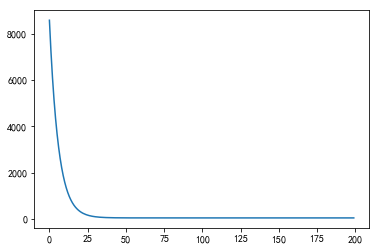

In [33]:
plt.plot(list(range(200)), losses)

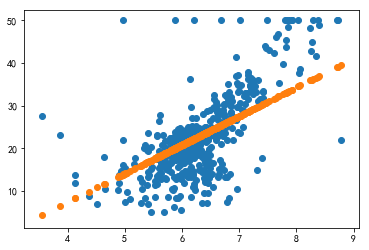

In [34]:
prices = [price(rm, k, b) for rm in x_rm]

plt.scatter(x_rm, y)
plt.scatter(x_rm, prices)